OVERVIEW
Thyroid cancer has been steadily increasing worldwide over the past few decades, with an estimated annual growth rate of 3-5% in many regions. In the United States alone, the incidence has nearly tripled since the 1970s, making it one of the fastest-rising cancers. The rise is primarily attributed to improved diagnostic techniques, particularly the increased use of ultrasound and fine-needle aspiration biopsy, leading to the detection of small, indolent tumors. Other contributing factors include radiation exposure, genetic predisposition, hormonal influences, and possible links to environmental pollutants. Despite the rising incidence, the mortality rate remains relatively low, with a 5-year survival rate exceeding 98%, especially for the most common type, papillary thyroid cancer. However, more aggressive subtypes, such as anaplastic thyroid cancer, have significantly poorer outcomes.

BUSINESS PROBLEM
A healthcare provider aims to improve the early detection and diagnosis of thyroid cancer, thereby enhancing patient outcomes and reducing healthcare costs. By leveraging patient data, including demographics, medical history, lifestyle factors, and thyroid hormone levels, the provider seeks to develop predictive models and risk stratification tools that aid clinicians in making more informed decisions regarding patient management and follow-up.

OBJECTIVES
1.Develop and validate a machine learning model that accurately predicts the risk of thyroid cancer (Diagnosis: Benign/Malignant) based on patient data.
2.Identify Key Risk Factors: Determine the most influential factors (e.g., age, family history, TSH levels) associated with thyroid cancer risk. 
3. Improve Risk Stratification: Enhance the current risk stratification process (Thyroid_Cancer_Risk: Low/Medium/High) by developing a more precise and data-driven approach.


DATA UNDERSTANDING
Patient_ID (int): Unique identifier for each patient.
Age (int): Age of the patient.
Gender (object): Patient’s gender (Male/Female).
Country (object): Country of residence.
Ethnicity (object): Patient’s ethnic background.
Family_History (object): Whether the patient has a family history of thyroid cancer (Yes/No).
Radiation_Exposure (object): History of radiation exposure (Yes/No).
Iodine_Deficiency (object): Presence of iodine deficiency (Yes/No).
Smoking (object): Whether the patient smokes (Yes/No).
Obesity (object): Whether the patient is obese (Yes/No).
Diabetes (object): Whether the patient has diabetes (Yes/No).
TSH_Level (float): Thyroid-Stimulating Hormone level (µIU/mL).
T3_Level (float): Triiodothyronine level (ng/dL).
T4_Level (float): Thyroxine level (µg/dL).
Nodule_Size (float): Size of thyroid nodules (cm).
Thyroid_Cancer_Risk (object): Estimated risk of thyroid cancer (Low/Medium/High).
Diagnosis (object): Final diagnosis (Benign/Malignant).

In [3]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the dataset
df = pd.read_csv('thyroid_cancer_risk_data.csv')
# checking the first 5 rows
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [4]:
# checking the last 5 rows
df.tail()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign
212690,212691,46,Female,Japan,Middle Eastern,No,No,No,Yes,No,No,5.60,2.73,10.59,2.53,Low,Malignant


In [5]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [6]:
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


DATA PREPARATION
DATA CLEANING

In [7]:
# Checking missing values 
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [8]:
# there are no missing values in this data set

In [9]:
# checking duplicates
df.duplicated().sum()

0

In [10]:
# there are no duplicates in this data set.

In [11]:
# feature engineering
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [12]:
# Lifestyle risk evaluation
#df['lifestyle_score'] = df['Diabetes']+ df['Obesity']+ df['Smoking']
#df.head()

In [13]:
# nodule size categorization
df['Nodule_Size'].unique()

array([1.08, 4.05, 4.61, 2.46, 2.11, 0.02, 0.01, 4.3 , 0.81, 1.44, 0.35,
       3.87, 4.15, 0.38, 1.68, 2.86, 0.25, 4.93, 1.63, 2.27, 2.41, 0.46,
       4.79, 3.63, 4.64, 4.22, 1.54, 4.26, 4.  , 3.06, 0.04, 3.4 , 0.17,
       0.09, 2.68, 3.9 , 3.76, 3.65, 1.14, 3.56, 3.57, 3.15, 4.21, 1.66,
       0.71, 4.27, 0.86, 2.7 , 1.25, 2.18, 1.09, 2.54, 4.99, 1.57, 1.64,
       1.75, 2.59, 2.55, 2.83, 1.06, 3.25, 2.32, 0.26, 2.01, 2.04, 1.76,
       0.72, 4.49, 0.42, 4.88, 0.24, 3.29, 2.5 , 0.84, 3.5 , 4.23, 3.3 ,
       3.01, 3.31, 1.3 , 0.77, 2.19, 4.47, 4.54, 3.36, 3.17, 3.91, 2.78,
       0.73, 4.77, 3.59, 0.37, 2.03, 0.19, 2.71, 1.17, 4.08, 2.77, 2.6 ,
       4.78, 1.59, 2.05, 4.01, 4.67, 0.44, 0.95, 3.81, 0.29, 1.11, 3.93,
       2.75, 0.83, 1.39, 1.02, 0.47, 4.04, 3.53, 4.12, 4.83, 3.69, 1.38,
       1.33, 4.81, 4.39, 0.65, 1.47, 0.18, 1.23, 1.05, 0.3 , 2.48, 0.92,
       2.69, 2.22, 0.66, 2.02, 0.15, 4.96, 3.09, 4.06, 1.22, 3.54, 0.23,
       0.68, 3.08, 1.37, 3.64, 1.1 , 0.27, 1.95, 4.

In [14]:
# Categorizing node by size
df['nodule_size_category'] = pd.cut(df['Nodule_Size'], 
                                    bins=[0, 1, 3, 5, 10, float('inf')], 
                                    labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
df.head()


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,nodule_size_category
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,Small
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,Medium
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,Medium
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,Small
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,Small


In [15]:
df['Country'].unique()

array(['Russia', 'Germany', 'Nigeria', 'India', 'UK', 'South Korea',
       'Brazil', 'China', 'Japan', 'USA'], dtype=object)

In [16]:
# geographical risk
high_risk_countries = ['USA', 'Canada', 'Australia', 'South Korea']  
df['geo_risk'] = df['Country'].apply(lambda x: 1 if x in high_risk_countries else 0)
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,nodule_size_category,geo_risk
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,Small,0
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,Medium,0
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,Medium,0
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,Small,0
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,Small,0


In [17]:
df['Ethnicity'].unique()

array(['Caucasian', 'Hispanic', 'Asian', 'African', 'Middle Eastern'],
      dtype=object)

In [18]:
# ethnicity risk
df['ethnicity_risk'] = df['Ethnicity'].map({'Asian': 1, 'Caucasian': 0.8, 'Hispanic': 0.7, 'African': 0.9}).fillna(0.5)
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,nodule_size_category,geo_risk,ethnicity_risk
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,Small,0,0.8
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,Medium,0,0.7
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,Medium,0,0.8
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,Small,0,1.0
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,Small,0,0.9


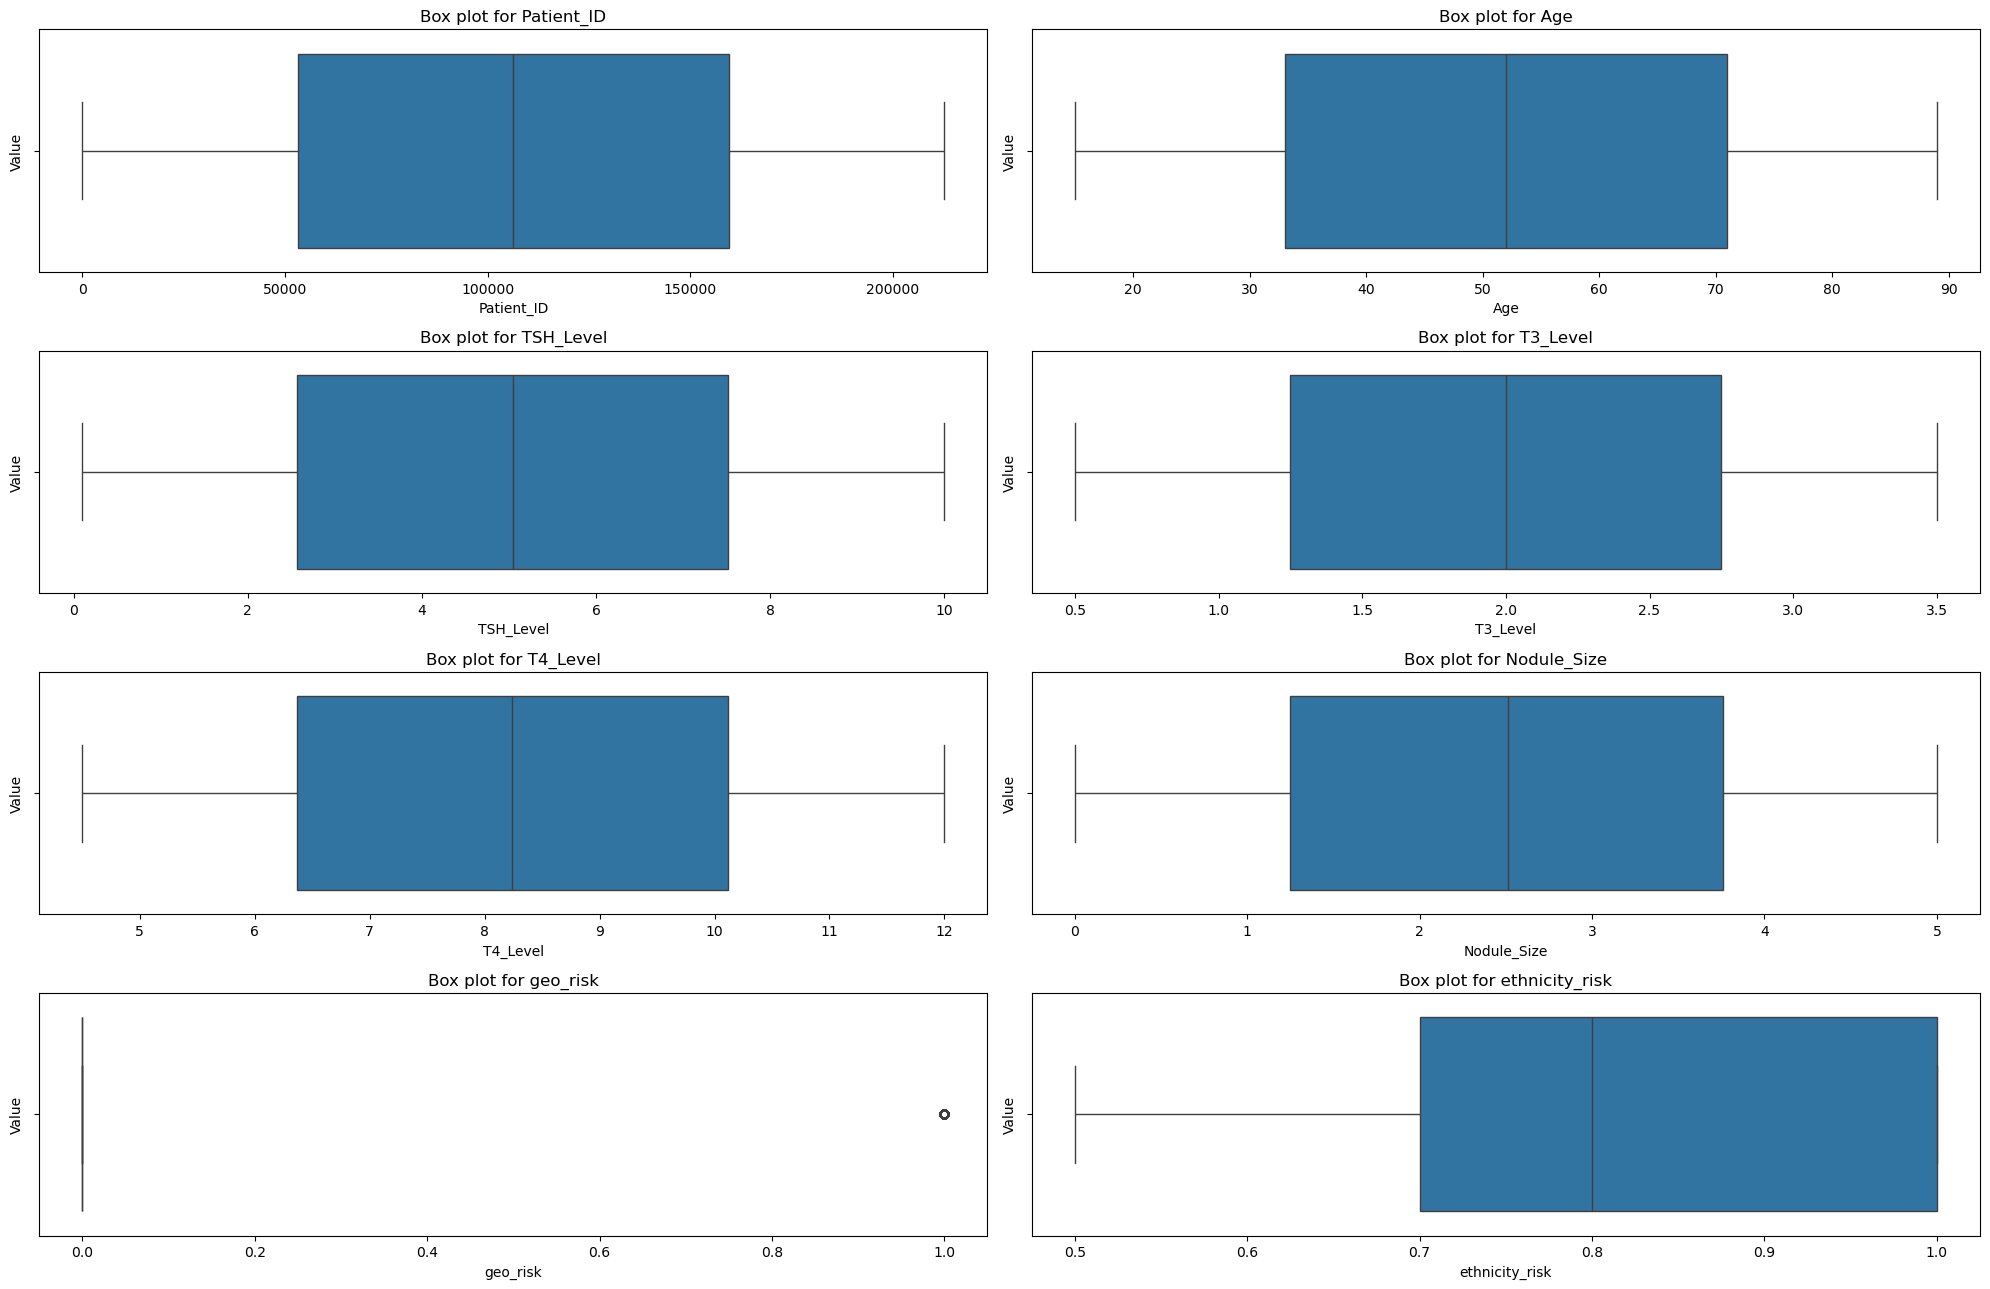

In [19]:
# Checking for outliers
#Only select numeric columns 
numeric_columns = df.select_dtypes(include=['float','integer']).columns[:]

# Grid layout
rows, cols = 4, 2
fig, axes = plt.subplots(rows, cols, figsize=(20, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

Patient ID: Shows the range of patient IDs in the dataset.
The distribution appears uniform, as expected for unique identifiers.

Age: The age distribution is roughly symmetrical.
The median age is likely around 50-60 years old.
The age range spans from around 20 to 90 years.

TSH Level (Thyroid-Stimulating Hormone):
The TSH level distribution is positively skewed (tail to the right).   
Most patients have TSH levels below 5.
There are several potential outliers with high TSH levels, indicating possible thyroid issues.

T3 Level (Triiodothyronine):
The T3 level distribution is also positively skewed.
The majority of patients have T3 levels below 2.5.
Outliers are present with higher T3 levels.

T4 Level (Thyroxine):
The T4 level distribution appears relatively symmetrical.
The median is likely around 8-9.

Nodule Size:
The nodule size distribution is positively skewed, with most patients having smaller nodules.
There are several outliers with larger nodule sizes.

Geo Risk (Geographic Risk):
A larger proportion of patients have a geo risk of 1.

Ethnicity Risk:
A larger proportion of patients have an ethnicity risk of 1.

DATA ANALYSIS

In [20]:
# numerical summary
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,geo_risk,ethnicity_risk
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403,0.120000,0.824881
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631,0.324963,0.148070
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000,0.000000,0.500000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000,0.000000,0.700000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000,0.000000,0.800000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000,0.000000,1.000000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000,1.000000,1.000000


In [21]:
# categorical summary
df.describe(include='object') 

,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,Diagnosis
count,212691,212691,212691,212691,212691,212691,212691,212691,212691,212691,212691
unique,2,10,5,2,2,2,2,2,2,3,2
top,Female,India,Caucasian,No,No,No,No,No,No,Low,Benign
freq,127527,42496,63669,148866,180831,159673,170260,148805,170098,108388,163196


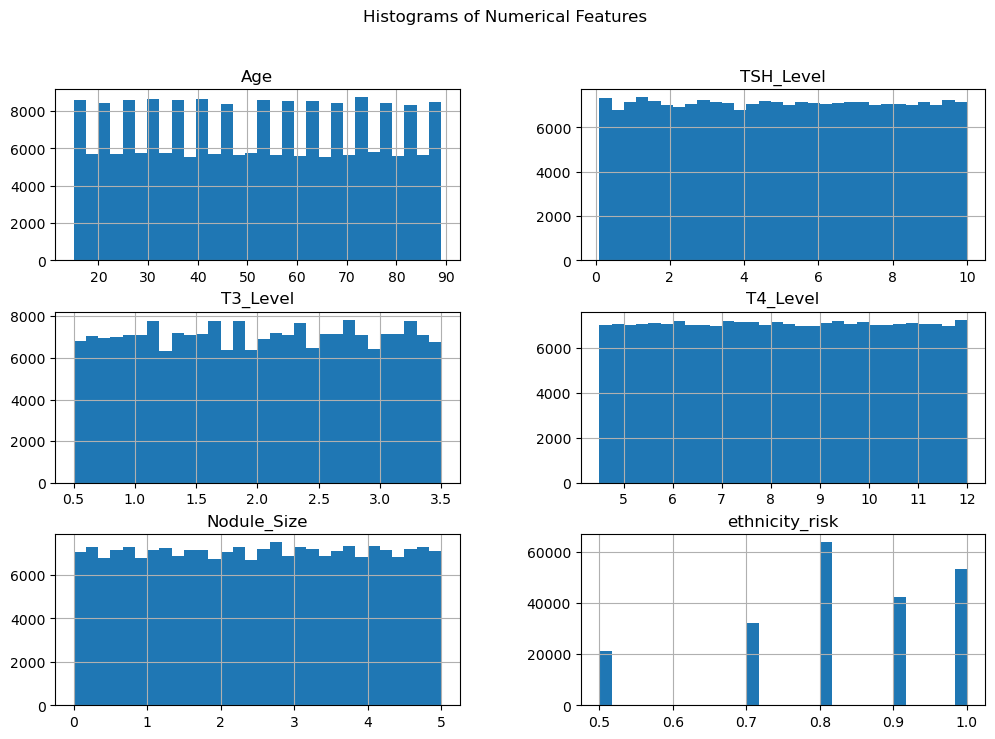

In [22]:
#  Distribution of numerical variables
num_features = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size', 'ethnicity_risk']
df[num_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Features")
plt.show()

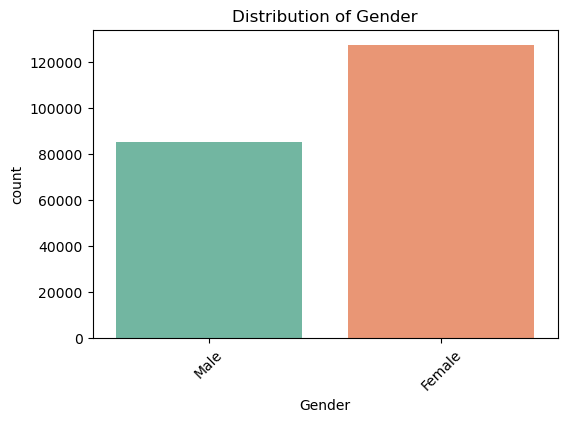

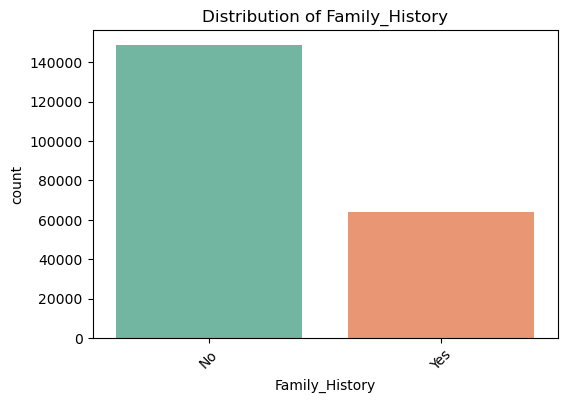

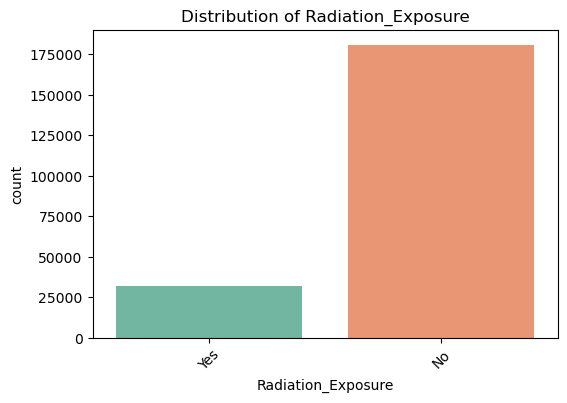

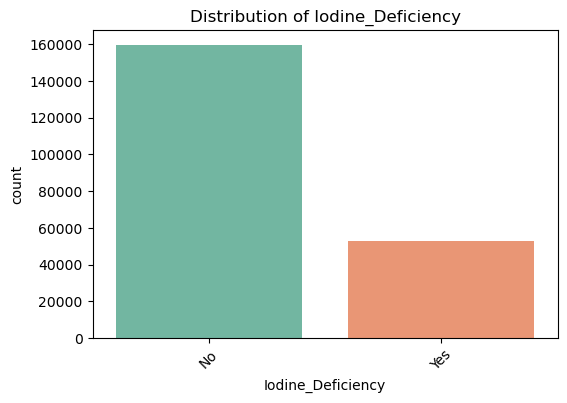

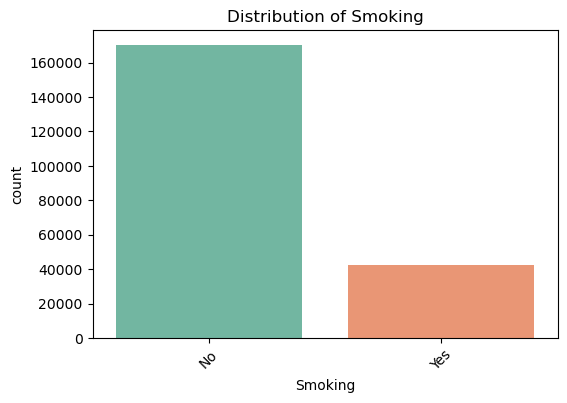

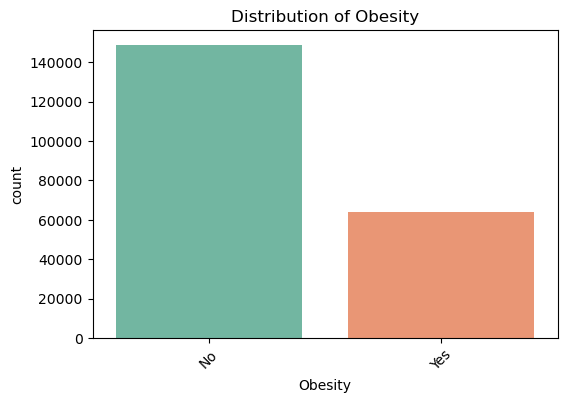

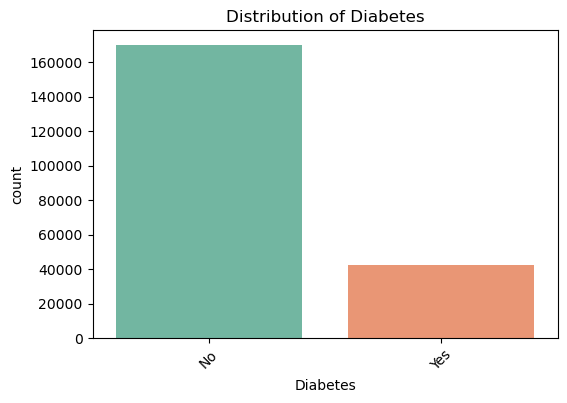

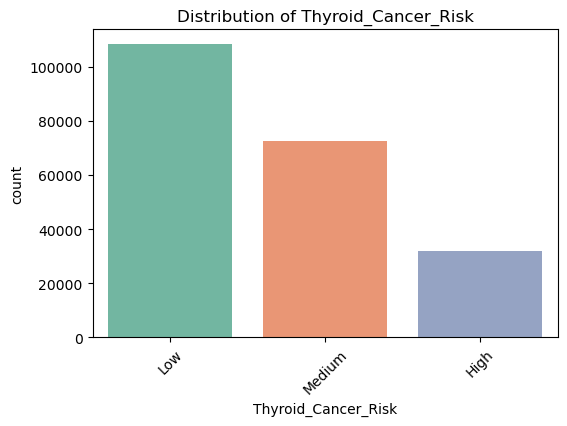

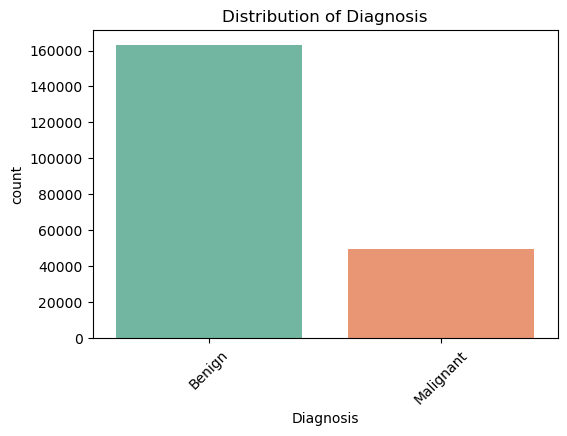

In [23]:
#  Count plots for categorical variables
cat_features = ['Gender', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency', 
                'Smoking', 'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk', 'Diagnosis']

for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col],hue=df[col], palette="Set2", legend=False) 
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

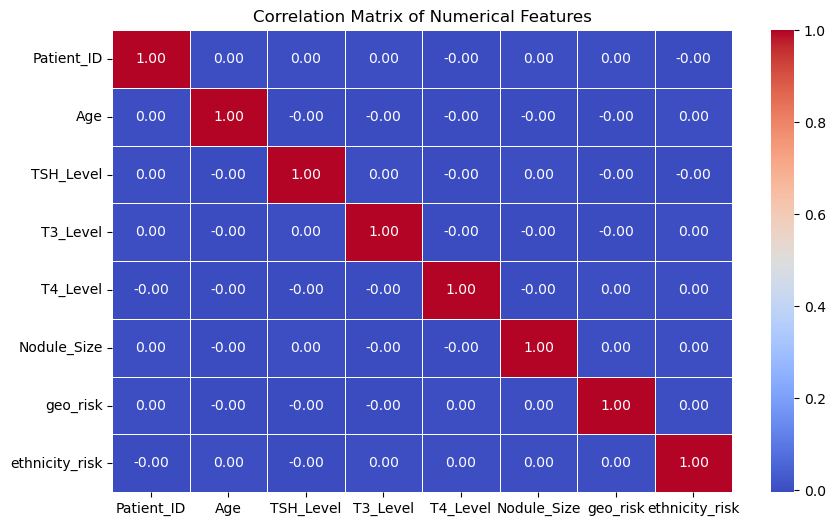

In [24]:
# Select only numerical columns
num_df = df.select_dtypes(include=['int64', 'float64'])  # Excludes categorical columns

# Compute and plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


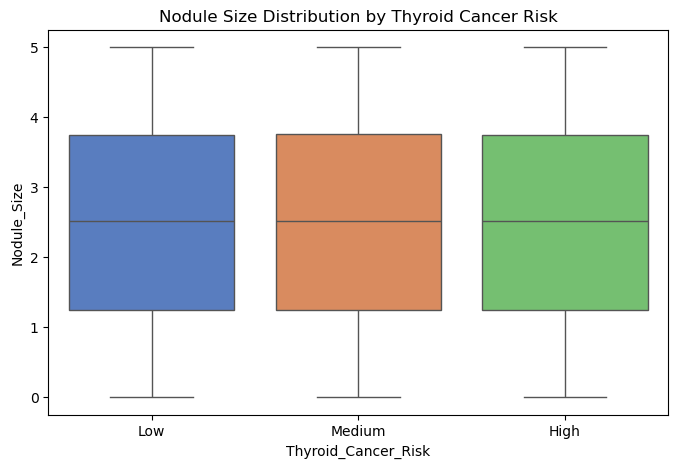

In [25]:
# Box plot for Thyroid Cancer Risk vs Nodule Size
plt.figure(figsize=(8, 5))
sns.boxplot(x='Thyroid_Cancer_Risk', y='Nodule_Size', data=df, hue='Thyroid_Cancer_Risk', palette="muted", dodge=False)
plt.title("Nodule Size Distribution by Thyroid Cancer Risk")
plt.show()

Key Insight:
The boxplot shows the distribution of nodule sizes across different thyroid cancer risk categories. While the median nodule sizes appear similar, there's a possibility of increased variability in nodule size with higher risk. However, the substantial overlap in distributions suggests that nodule size alone is not a definitive indicator of risk. 

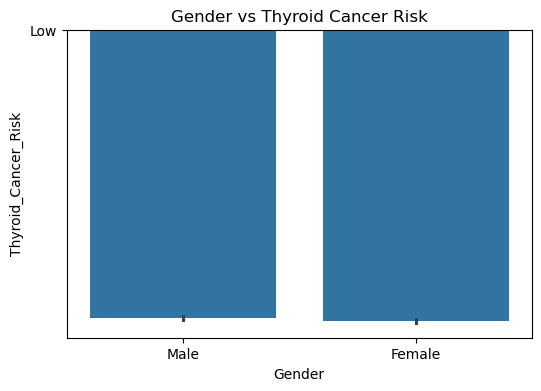

In [26]:
#3. Barplot: Thyroid Cancer Risk by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x="Gender", y="Thyroid_Cancer_Risk", data=df)
plt.title("Gender vs Thyroid Cancer Risk")
plt.show()

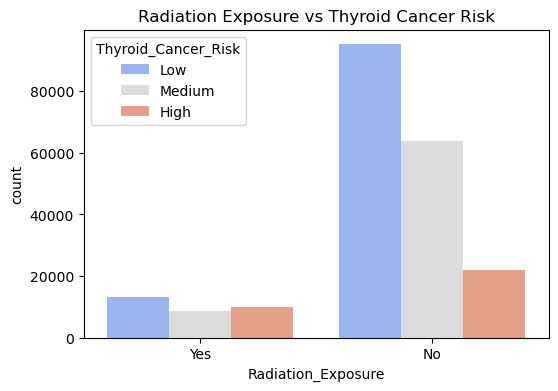

In [27]:
#4. Radiation Exposure vs Cancer Risk
plt.figure(figsize=(6, 4))
sns.countplot(x="Radiation_Exposure", hue="Thyroid_Cancer_Risk", data=df, palette="coolwarm")
plt.title("Radiation Exposure vs Thyroid Cancer Risk")
plt.show()

Insights:
- Radiation Exposure as a Potential Risk Factor: The chart suggests that there might be a higher proportion of medium and high-risk individuals among those with radiation exposure, warranting further investigation into radiation exposure as a potential risk factor for thyroid cancer.

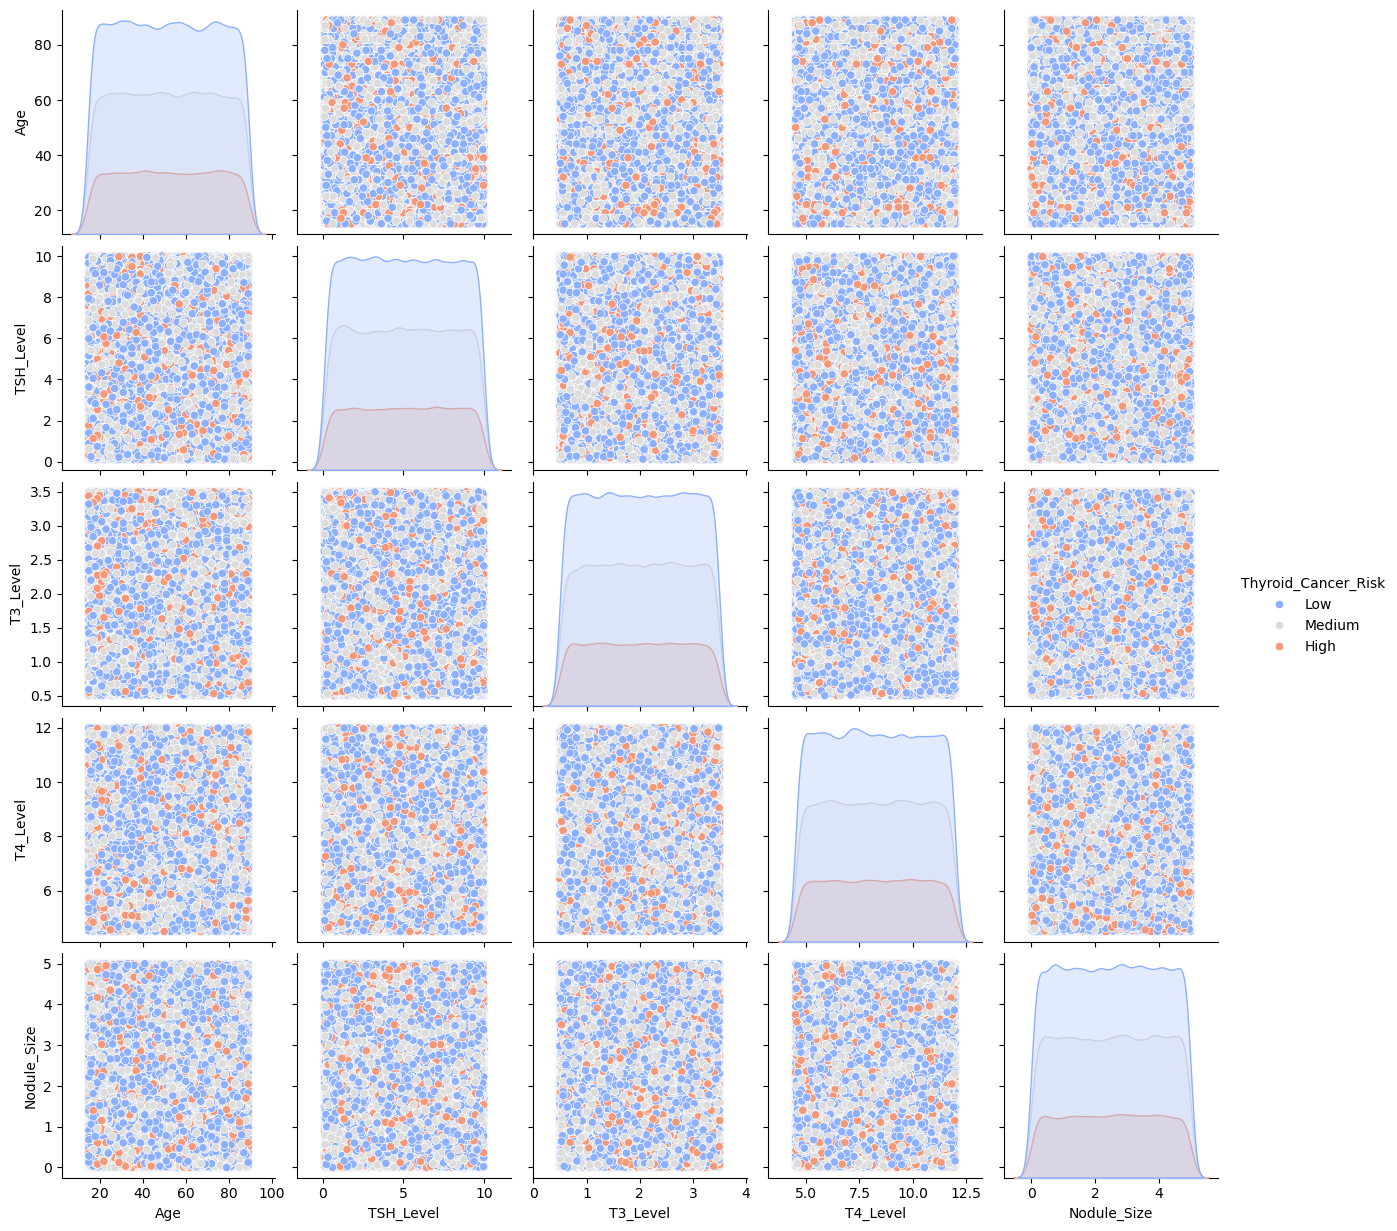

In [28]:
# 1. Pairplot for key numerical features
sns.pairplot(df, vars=['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size'], 
             hue='Thyroid_Cancer_Risk', palette='coolwarm')
plt.show()

Observations:
- Weak Linear Relationships: The scatter plots suggest that there are no strong linear relationships between the variables examined, regardless of thyroid cancer risk.
- Skewed Distributions: TSH, T3, and Nodule Size exhibit positively skewed distributions, indicating that most patients have lower values, with a few having significantly higher values.
- Similar Distributions Across Risk Groups: The distributions of the variables appear to be relatively similar across the three risk categories, suggesting that these individual variables might not be strong discriminators of thyroid cancer risk on their own.
- Potential for Non-Linear Relationships: The absence of strong linear relationships doesn't rule out the possibility of non-linear relationships or interactions between these variables that might be associated with thyroid cancer risk.



MODELING

In [5]:
# Preprocessing
# conversion of categorical data into numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri